In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [3]:
IMAGE_SIZE = 256
CHANNELS = 3

In [4]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 1506 images belonging to 3 classes.


In [5]:
train_generator.class_indices


{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [6]:

class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:

count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.6357165  0.5729714  0.6121871 ]
  [0.5358913  0.47314617 0.5123619 ]
  [0.6246774  0.5619323  0.601148  ]
  ...
  [0.68545014 0.6187835  0.650156  ]
  [0.6851937  0.618527   0.64989954]
  [0.6849373  0.61827064 0.6496432 ]]

 [[0.63783216 0.575087   0.61430275]
  [0.5339038  0.4711587  0.51037437]
  [0.62724197 0.5644968  0.60371256]
  ...
  [0.66072077 0.5940541  0.62542665]
  [0.6576434  0.5909767  0.62234926]
  [0.654566   0.5878993  0.6192719 ]]

 [[0.63994783 0.57720274 0.6164184 ]
  [0.5319163  0.46917126 0.5083869 ]
  [0.6298064  0.56706125 0.606277  ]
  ...
  [0.49301556 0.42634887 0.4577214 ]
  [0.49634933 0.42968267 0.46105522]
  [0.49968314 0.43301648 0.46438903]]

 ...

 [[0.55779916 0.47936782 0.5146619 ]
  [0.5587609  0.4803295  0.51562357]
  [0.5597226  0.48129117 0.5165853 ]
  ...
  [0.5985265  0.5240166  0.5475461 ]
  [0.68528754 0.61077774 0.63430715]
  [0.65303093 0.57852113 0.60205054]]

 [[0.6062331  0.52780175 0.56309587]
  [0.60700244 0.52857107 0.5638652 ]


In [8]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [9]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 431 images belonging to 3 classes.


In [11]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.6156863  0.5882353  0.61960787]
  [0.61691266 0.5894617  0.62083423]
  [0.61960787 0.5921569  0.62352943]
  ...
  [0.71830213 0.6751649  0.69085115]
  [0.7186054  0.67546815 0.6911544 ]
  [0.71890867 0.6757714  0.6914577 ]]

 [[0.6156863  0.5882353  0.61960787]
  [0.61660945 0.5891585  0.620531  ]
  [0.61960787 0.5921569  0.62352943]
  ...
  [0.722212   0.67907476 0.69476104]
  [0.7225152  0.679378   0.69506425]
  [0.7228185  0.67968124 0.6953675 ]]

 [[0.6156863  0.5882353  0.61960787]
  [0.6163062  0.5888552  0.62022775]
  [0.61960787 0.5921569  0.62352943]
  ...
  [0.7267534  0.68361616 0.69930243]
  [0.72735995 0.6842227  0.699909  ]
  [0.7279664  0.6848292  0.70051545]]

 ...

 [[0.5188633  0.4678829  0.49533388]
  [0.5182568  0.4672764  0.49472737]
  [0.51765025 0.4666699  0.49412087]
  ...
  [0.56078434 0.5019608  0.52156866]
  [0.59574705 0.5369235  0.55653137]
  [0.63093555 0.57211196 0.59171987]]

 [[0.5011385  0.4501581  0.47760907]
  [0.4996222  0.4486418  0.4760928 ]


In [12]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [13]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        3

In [14]:

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [15]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

Epoch 1/20
47/47 [==============================] - 29s 553ms/step - loss: 0.9119 - accuracy: 0.4640 - val_loss: 0.9149 - val_accuracy: 0.4792
Epoch 2/20
47/47 [==============================] - 19s 412ms/step - loss: 0.8669 - accuracy: 0.5678 - val_loss: 0.8677 - val_accuracy: 0.5104
Epoch 3/20
47/47 [==============================] - 19s 411ms/step - loss: 0.6963 - accuracy: 0.7083 - val_loss: 0.5675 - val_accuracy: 0.7760
Epoch 4/20
47/47 [==============================] - 20s 418ms/step - loss: 0.4333 - accuracy: 0.8134 - val_loss: 0.3726 - val_accuracy: 0.8333
Epoch 5/20
47/47 [==============================] - 19s 412ms/step - loss: 0.3233 - accuracy: 0.8738 - val_loss: 0.2060 - val_accuracy: 0.9375
Epoch 6/20
47/47 [==============================] - 19s 414ms/step - loss: 0.2634 - accuracy: 0.8928 - val_loss: 0.2545 - val_accuracy: 0.8958
Epoch 7/20
47/47 [==============================] - 19s 407ms/step - loss: 0.2200 - accuracy: 0.9118 - val_loss: 0.1237 - val_accuracy: 0.9583

In [16]:
scores = model.evaluate(test_generator)


14/14 [==============================] - 6s 459ms/step - loss: 0.1590 - accuracy: 0.9536


In [17]:
scores


[0.15899443626403809, 0.953596293926239]

In [18]:
history

In [19]:
history.params


{'verbose': 1, 'epochs': 20, 'steps': 47}

In [20]:
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [21]:
type(history.history['loss'])


list

In [22]:
len(history.history['loss'])


20

In [23]:
history.history['loss'][:5] # show loss for first 5 epochs


[0.9118595123291016,
 0.8669103980064392,
 0.6962705254554749,
 0.43326160311698914,
 0.3232552409172058]

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [25]:
val_acc

[0.4791666567325592,
 0.5104166865348816,
 0.7760416865348816,
 0.8333333134651184,
 0.9375,
 0.8958333134651184,
 0.9583333134651184,
 0.9270833134651184,
 0.953125,
 0.9322916865348816,
 0.9583333134651184,
 0.6614583134651184,
 0.9270833134651184,
 0.953125,
 0.953125,
 0.9635416865348816,
 0.9635416865348816,
 0.9791666865348816,
 0.9791666865348816,
 0.9427083134651184]

In [26]:
acc


[0.46404340863227844,
 0.5678426027297974,
 0.7082768082618713,
 0.8134328126907349,
 0.873812735080719,
 0.8928086757659912,
 0.9118046164512634,
 0.9525101780891418,
 0.9633650183677673,
 0.9572591781616211,
 0.9511533379554749,
 0.9267299771308899,
 0.8527815341949463,
 0.9389416575431824,
 0.9633650183677673,
 0.9803256392478943,
 0.9810040593147278,
 0.9830393195152283,
 0.9776119589805603,
 0.972862958908081]

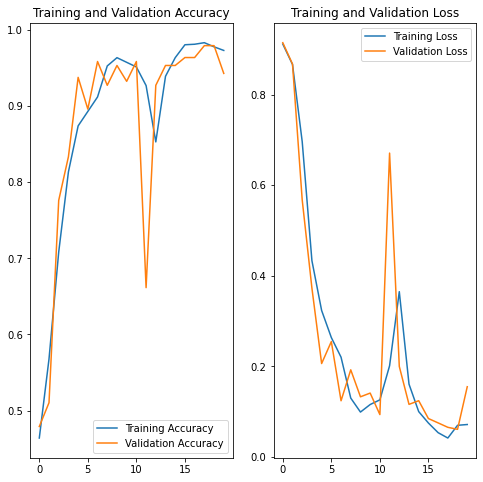

In [27]:

EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Late_blight
predicted label: Potato___Late_blight


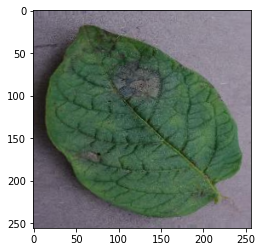

In [30]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [31]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

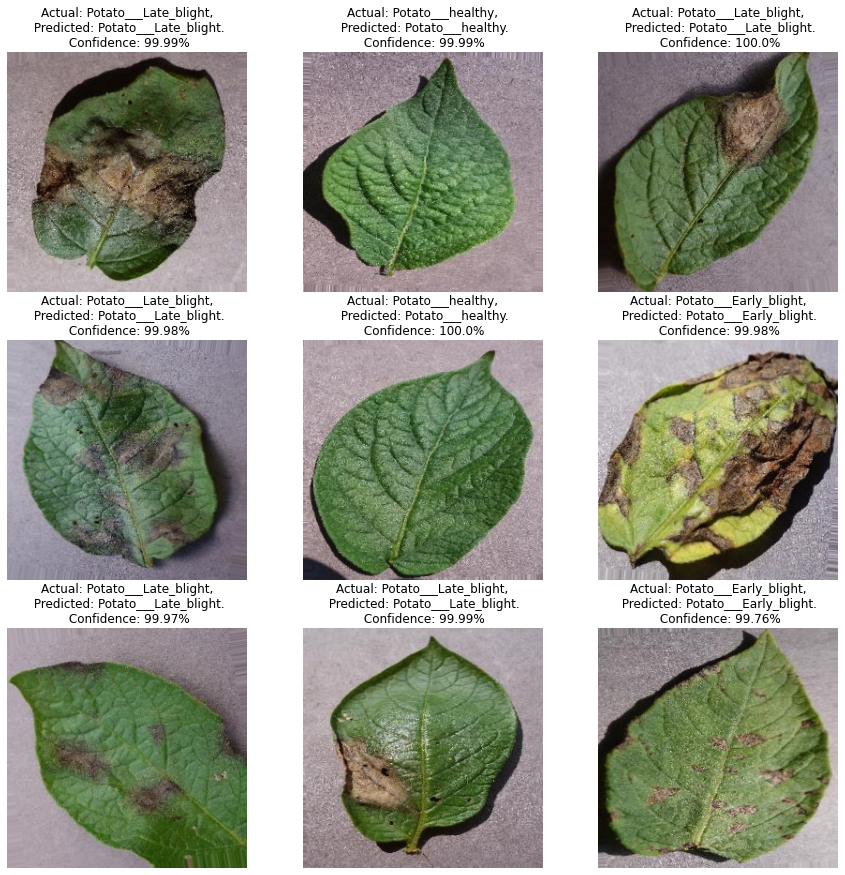

In [32]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [33]:
model.save("./potatoes.h5")
